In [23]:
import gym
import numpy as np
import time
import matplotlib.pyplot as plt

# Create FrozenLake environment
env = gym.make('FrozenLake-v0')

STATES = env.observation_space.n
ACTIONS = env.action_space.n
# Explore environment
print(STATES)
print(ACTIONS)

16
4


In [24]:
env.reset()
for _ in range(5):
    env.render()
    action = env.step(env.action_space.sample()) # take a random action
    # F: frozen, H: hole, S: start, G: goal
    print("New state: {}, Reward: {}, Done: {}, Info: {}".format(
        action[0], action[1], action[2], action[3]))
env.close()


SFFF
FHFH
FFFH
HFFG
New state: 0, Reward: 0.0, Done: False, Info: {'prob': 0.3333333333333333}
  (Left)
SFFF
FHFH
FFFH
HFFG
New state: 4, Reward: 0.0, Done: False, Info: {'prob': 0.3333333333333333}
  (Left)
SFFF
FHFH
FFFH
HFFG
New state: 0, Reward: 0.0, Done: False, Info: {'prob': 0.3333333333333333}
  (Up)
SFFF
FHFH
FFFH
HFFG
New state: 4, Reward: 0.0, Done: False, Info: {'prob': 0.3333333333333333}
  (Right)
SFFF
FHFH
FFFH
HFFG
New state: 0, Reward: 0.0, Done: False, Info: {'prob': 0.3333333333333333}


In [46]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values 
print(Q)

# Define hyperparameters
episodes = 1500
max_steps = 100
learning_rate = 0.8
gamma = 0.95

# Define exploration parameters
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.001

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [58]:
rewards = []

for episode in range(episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        if np.random.uniform(0, 1) > epsilon:
            action = np.argmax(Q[state,:])
        else:
            action = env.action_space.sample()

        new_state, reward, done, info = env.step(action)
        
        if episode < 1:
            print(f"new_state: {new_state}, reward: {reward}, done: {done}, info: {info}")

        Q[state, action] = Q[state, action] + learning_rate * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])
        total_rewards = total_rewards + reward
        state = new_state
        
        # If done finish episode
        if done == True:
            break
        
    episode += 1
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(total_rewards)

print ("Score over time: " +  str(sum(rewards)/episodes))
print(Q)
print(epsilon)

new_state: 1, reward: 0.0, done: False, info: {'prob': 0.3333333333333333}
new_state: 1, reward: 0.0, done: False, info: {'prob': 0.3333333333333333}
new_state: 5, reward: 0.0, done: True, info: {'prob': 0.3333333333333333}
Score over time: 0.044
[[1.39553810e-01 1.40956614e-01 1.46758045e-01 1.36713293e-01]
 [1.39919208e-01 3.20478076e-02 1.57027806e-01 1.53207074e-01]
 [1.95083748e-01 9.44992708e-02 1.03257141e-01 1.04334376e-01]
 [5.30402234e-02 1.15784854e-03 1.88256941e-02 9.36248540e-02]
 [1.52676479e-01 1.34809626e-01 3.44357485e-02 3.73142087e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.19316304e-03 2.31264226e-02 2.30655786e-01 4.16802291e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.58032938e-02 7.04533130e-02 9.43405281e-04 1.96830513e-01]
 [5.92636124e-01 2.13746733e-01 1.37619997e-01 9.90176671e-02]
 [4.15094709e-01 1.41258155e-01 3.14989206e-02 8.72859594e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+0

In [60]:
env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):
        env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(Q[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            break
        state = new_state
env.close()

****************************************************
EPISODE  0

SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
****************************************************
EPISODE  1

SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
****************************************************
EPISODE  2

SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
****************************************************
EPISODE  3

SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
S

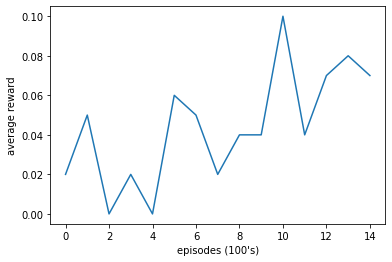

In [61]:
def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()